In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")

Загружаем таблицу с локального сервера.Таблица очищена от выбросов,проверена на наличие пропусков и повторений,все данные имеют числовую характеристику. 

In [2]:
df = pd.read_excel(r"C:\Users\55944\Desktop\888\data_iqr_2.xlsx")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [3]:
columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа','Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки','Прочность при растяжении, МПа']

In [4]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Проводим масштабирование переменных используя Normalizer

In [5]:
#Нормализуем данные с помощью Normalizer,нормализация по столбцам
#создаем переменную 
norm_scaler=Normalizer()
df_norm=norm_scaler.fit_transform(np.array(df[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки','Шаг нашивки','Плотность нашивки']]))
df_norm[:1]

array([[4.98991831e-04, 5.45436455e-01, 1.98489657e-01, 1.34343955e-02,
        6.38133784e-03, 7.64727126e-02, 5.64244609e-02, 1.88081536e-02,
        8.06063727e-01, 5.91113400e-02, 0.00000000e+00, 1.07475164e-03,
        1.61212745e-02]])

In [6]:
#возвращаем названия столбцов,нормализованную матрицу
df_norm=pd.DataFrame(data=df_norm,columns=['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы','Угол нашивки','Шаг нашивки','Плотность нашивки'])
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа",Потребление смолы,Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
2,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805167,0.059046,0.000000,0.001342,0.015298
3,0.000746,0.539271,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808906,0.059320,0.000000,0.001348,0.016178
4,0.000699,0.519919,0.219673,0.030449,0.006062,0.077475,0.057164,0.019055,0.816627,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.000700,0.601751,0.281397,0.026816,0.006203,0.100115,0.064488,0.022531,0.735908,0.038535,0.000308,0.002798,0.014494
918,0.001078,0.641795,0.139227,0.045701,0.006136,0.079584,0.109777,0.022828,0.738938,0.036856,0.000313,0.003308,0.016827
919,0.000953,0.573123,0.121122,0.032118,0.006961,0.072186,0.215067,0.021716,0.773775,0.068752,0.000291,0.001209,0.019652
920,0.001192,0.664667,0.238453,0.045473,0.006190,0.088689,0.206291,0.023812,0.666248,0.063394,0.000322,0.002030,0.018736


In [7]:
df_norm.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Выделяем признаки и целевую переменную.Разбиваем данные на тренировочную и    тестовую выборки.

In [8]:
# отберем признаки и поместим их в переменную X
x=df_norm[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
        'Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки']]
# целевую переменную поместим в переменную y
y=df_norm[['Прочность при растяжении, МПа']]

In [9]:
x.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Потребление смолы', 'Угол нашивки', 'Шаг нашивки',
       'Плотность нашивки'],
      dtype='object')

In [10]:
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [11]:
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# ПРОГНОЗИРУЕМ ПРОЧНОСТЬ ПРИ РАСТЯЖЕНИИ

# Регрессия случайного леса
​

In [12]:
regressor_RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_RF.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [13]:
y_pred_RF = regressor_RF.predict(x_test)

In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_RF))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print ('R_Squared:', r2_score(y_test, y_pred_RF))

Mean Absolute Error: 0.008978510964183757
Mean Squared Error: 0.00021922614079497512
Root Mean Squared Error: 0.01480628720493342
R_Squared: 0.9575855999556284


In [15]:
R_Squared_RF=r2_score(y_test, y_pred_RF)

In [16]:
print("Train score: {:.2f}".format(regressor_RF.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_RF.score(x_test, y_test)))

Train score: 0.99
Test score: 0.96


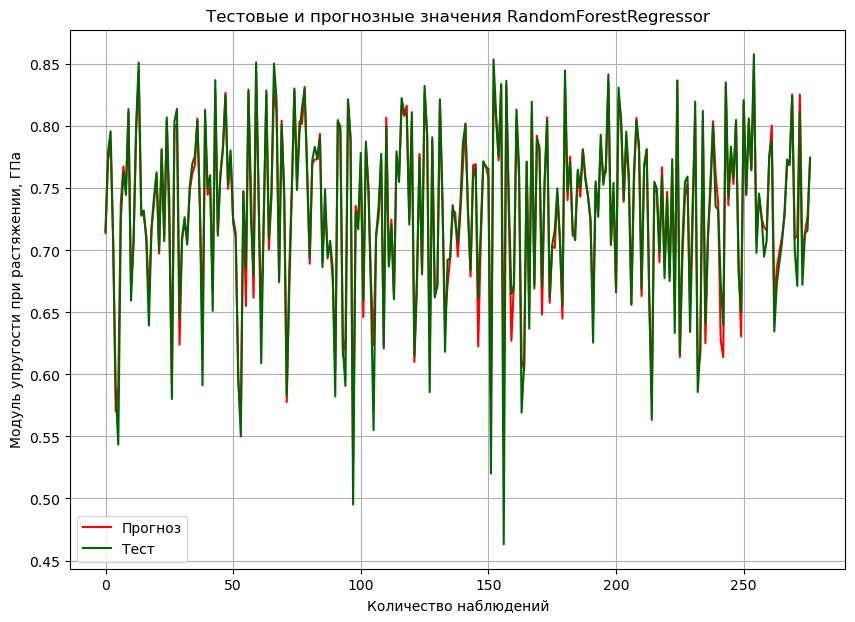

In [17]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(y_pred_RF, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Регрессия дерева решений

In [18]:
from graphviz import Source
from sklearn import tree

In [19]:
regressor_DT = DecisionTreeRegressor( random_state = 0)
regressor_DT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

[Text(0.6212458322978794, 0.9705882352941176, 'X[1] <= 0.615\nsquared_error = 0.005\nsamples = 645\nvalue = 0.731'),
 Text(0.3401064964380384, 0.9117647058823529, 'X[1] <= 0.554\nsquared_error = 0.002\nsamples = 412\nvalue = 0.766'),
 Text(0.15266215208747516, 0.8529411764705882, 'X[2] <= 0.23\nsquared_error = 0.001\nsamples = 171\nvalue = 0.797'),
 Text(0.09893762425447317, 0.7941176470588235, 'X[6] <= 0.228\nsquared_error = 0.001\nsamples = 97\nvalue = 0.813'),
 Text(0.06368041749502983, 0.7352941176470589, 'X[1] <= 0.528\nsquared_error = 0.0\nsamples = 79\nvalue = 0.821'),
 Text(0.024643803843605035, 0.6764705882352942, 'X[1] <= 0.482\nsquared_error = 0.0\nsamples = 45\nvalue = 0.833'),
 Text(0.005964214711729622, 0.6176470588235294, 'X[4] <= 0.005\nsquared_error = 0.0\nsamples = 9\nvalue = 0.853'),
 Text(0.0026507620941020544, 0.5588235294117647, 'X[2] <= 0.049\nsquared_error = 0.0\nsamples = 2\nvalue = 0.877'),
 Text(0.0013253810470510272, 0.5, 'squared_error = 0.0\nsamples = 1\nv

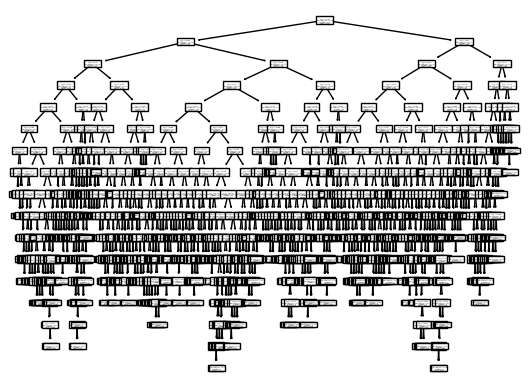

In [20]:
tree.plot_tree(regressor_DT)

In [21]:
y_pred_DT = regressor_DT.predict(x_test)

In [22]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_DT)))
print ('R Squared:', r2_score(y_test, y_pred_DT))

Mean Absolute Error: 0.014487641271940589
Mean Squared Error: 0.00037237279649041805
Root Mean Squared Error: 0.01929696340076381
R Squared: 0.9279558144904041


In [23]:
R_Squared_DT=r2_score(y_test, y_pred_DT)

In [24]:
print("Train score: {:.2f}".format(regressor_DT.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_DT.score(x_test, y_test)))

Train score: 1.00
Test score: 0.93


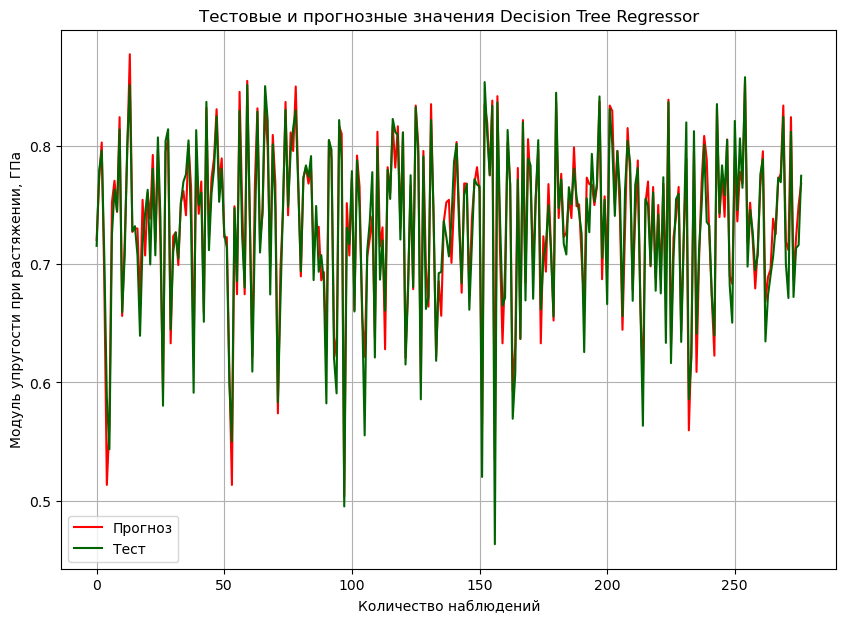

In [25]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Регрессия LASSO

In [26]:
from sklearn import linear_model
regressor_LS = linear_model.Lasso(alpha=0.1)
regressor_LS.fit(x_train, y_train)

Lasso(alpha=0.1)

In [27]:
y_pred_LS = regressor_LS.predict(x_test)

In [28]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_LS))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_LS))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_LS)))
print ('R Squared:', r2_score(y_test, y_pred_LS))

Mean Absolute Error: 0.057077049130840045
Mean Squared Error: 0.005168953492241516
Root Mean Squared Error: 0.07189543443252511
R Squared: -5.437506524108571e-05


In [29]:
R_Squared_LS=r2_score(y_test, y_pred_LS)

In [30]:
print("Train score: {:.2f}".format(regressor_LS.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_LS.score(x_test, y_test)))

Train score: 0.00
Test score: -0.00


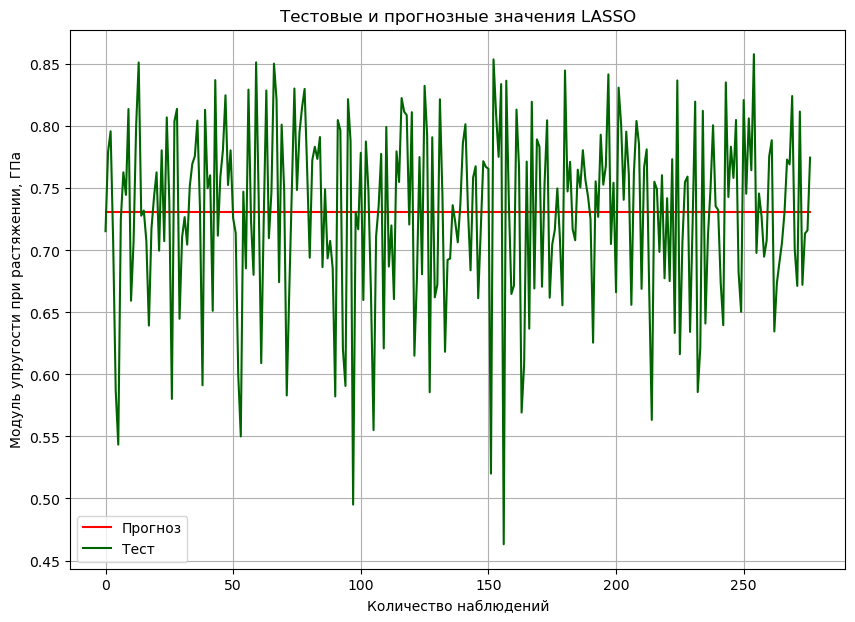

In [31]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения LASSO")
plt.plot(y_pred_LS, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# kNN

In [32]:
regressor_KNN = KNeighborsRegressor(n_neighbors=3)
regressor_KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
y_pred_KNN = regressor_KNN.predict(x_test)

In [34]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_KNN))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_KNN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_KNN)))
print ('R Squared:', r2_score(y_test, y_pred_KNN))

Mean Absolute Error: 0.011105574097627954
Mean Squared Error: 0.000286261826025606
Root Mean Squared Error: 0.016919273803139602
R Squared: 0.9446159862028614


In [35]:
R_Squared_KNN=r2_score(y_test, y_pred_KNN)

In [36]:
print("Train score: {:.2f}".format(regressor_KNN.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_KNN.score(x_test, y_test)))

Train score: 0.97
Test score: 0.94


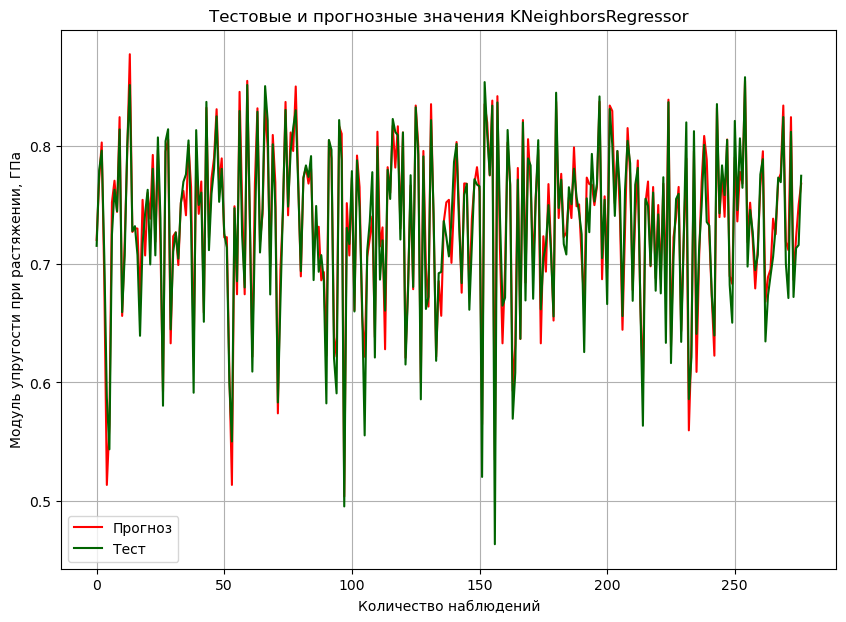

In [37]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения KNeighborsRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Метод опорных векторов(Support Vector Machines)


In [38]:
from sklearn import svm
regressor_SVR = svm.SVR()
regressor_SVR.fit(x_train, y_train)

SVR()

In [39]:
y_pred_SVR = regressor_SVR.predict(x_test)

In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_SVR))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_SVR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_SVR)))
print ('R Squared:', r2_score(y_test, y_pred_SVR))

Mean Absolute Error: 0.05419272296537005
Mean Squared Error: 0.003568401898160794
Root Mean Squared Error: 0.05973610213397585
R Squared: 0.30960958816843764


In [41]:
R_Squared_SVR=r2_score(y_test, y_pred_SVR)

In [42]:
print("Train score: {:.2f}".format(regressor_SVR.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_SVR.score(x_test, y_test)))

Train score: 0.24
Test score: 0.31


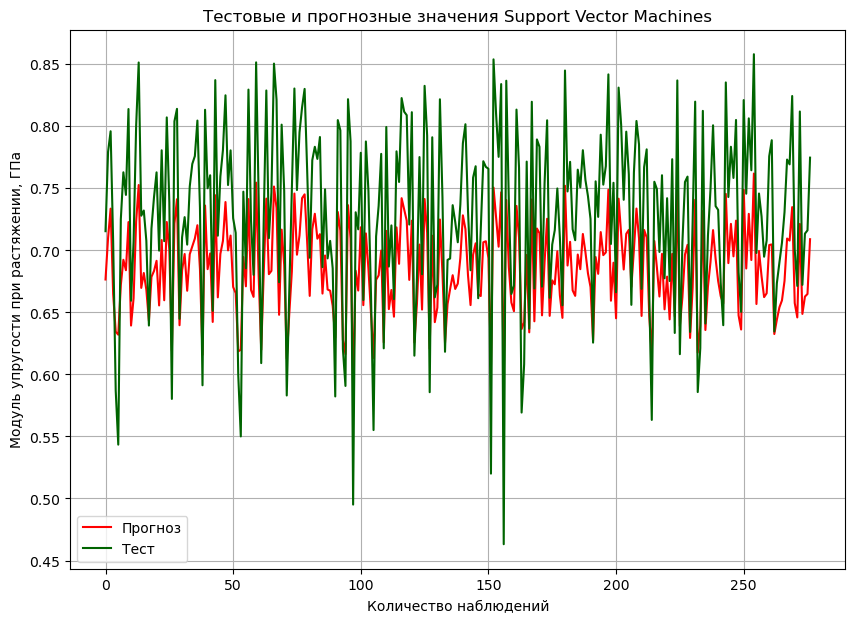

In [43]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Machines")
plt.plot(y_pred_SVR, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Гребневая регрессия (ридж-регрессия)

In [44]:
regressor_R = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
regressor_R.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]))

In [45]:
y_pred_R = regressor_R.predict(x_test)

In [46]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_R))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_R))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_R)))
print ('R Squared:', r2_score(y_test, y_pred_R))

Mean Absolute Error: 0.010773823463326625
Mean Squared Error: 0.00022060521774661327
Root Mean Squared Error: 0.014852784848189691
R Squared: 0.957318785417423


In [47]:
R_Squared_R=r2_score(y_test, y_pred_R)

In [48]:
print("Train score: {:.2f}".format(regressor_R.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_R.score(x_test, y_test)))

Train score: 0.96
Test score: 0.96


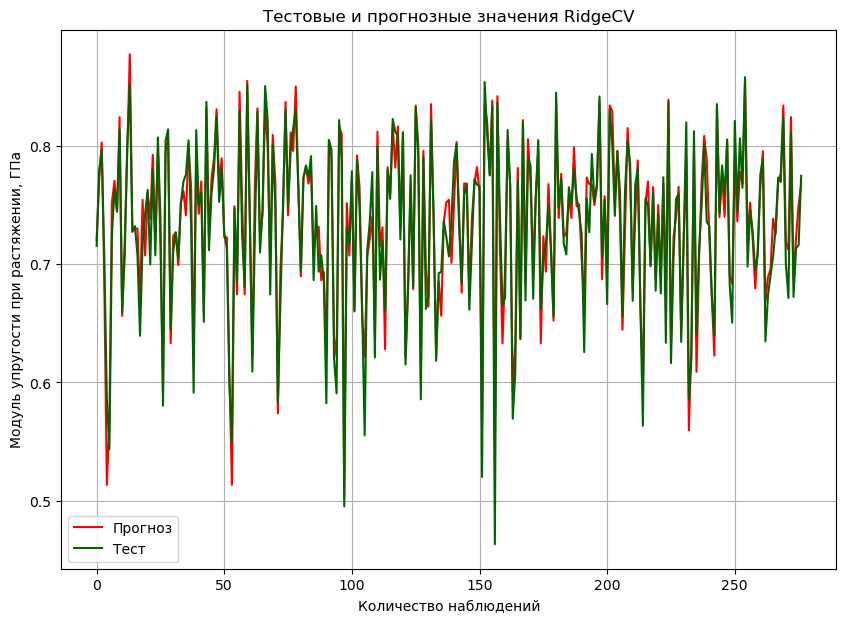

In [49]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения RidgeCV")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Метод градиентного бустинга - Gradient Boosting Regressor

In [50]:
regressor_GBR = GradientBoostingRegressor( random_state=0)
regressor_GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [51]:
y_pred_GBR = regressor_GBR.predict(x_test)

In [52]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_GBR)))
print ('R Squared:', r2_score(y_test, y_pred_GBR))

Mean Absolute Error: 0.006709427624578945
Mean Squared Error: 0.00011572435680689517
Root Mean Squared Error: 0.010757525589413914
R Squared: 0.9776104293644631


In [53]:
R_Squared_GBR=r2_score(y_test, y_pred_GBR)

In [54]:
print("Train score: {:.2f}".format(regressor_GBR.score(x_train, y_train)))
print("Test score: {:.2f}".format(regressor_GBR.score(x_test, y_test)))

Train score: 1.00
Test score: 0.98


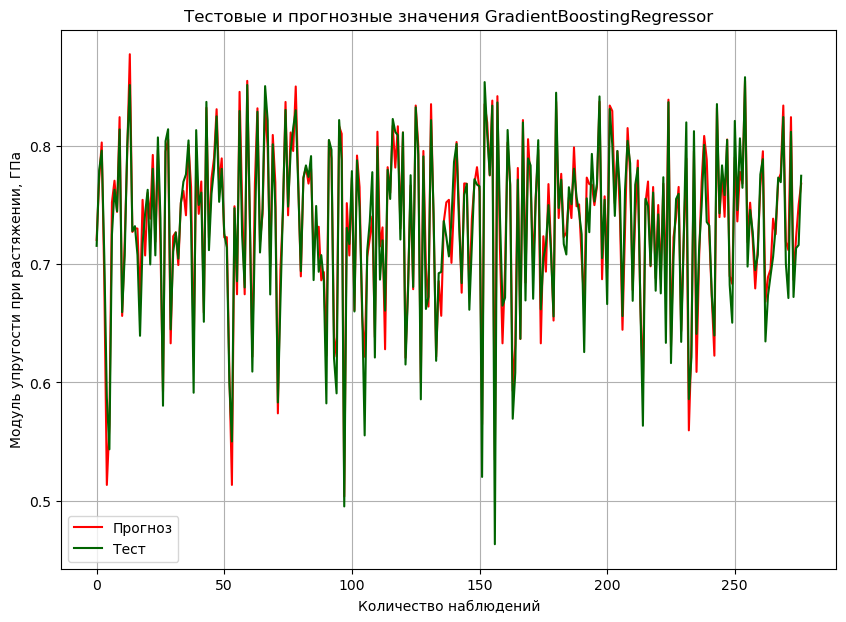

In [55]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Создадим таблицу с значениями R_Squared для каждого Регрессора

In [56]:
R_Squared_df_norm = {'Регрессор': ['Support Vector', 'RandomForest',  'GradientBoosting', 'KNeighbors', 'DecisionTree','Lasso','Ridge',], 'R_Squared': [R_Squared_SVR,R_Squared_RF,R_Squared_GBR,R_Squared_KNN, R_Squared_DT, R_Squared_LS,R_Squared_R]}
R_Squared_df_norm = pd.DataFrame(R_Squared_df_norm)

In [57]:
R_Squared_df_norm

,Регрессор,R_Squared
0,Support Vector,0.309610
1,RandomForest,0.957586
2,GradientBoosting,0.977610
3,KNeighbors,0.944616
4,DecisionTree,0.927956
5,Lasso,-0.000054
6,Ridge,0.957319


Наилучший показатель по метрике-R_Squared для сравнения работы алгоритмов -GradientBoosting,
наихудший -Lasso.

# Прогнозируем модуль упругости при растяжении

In [58]:
df_norm.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [59]:
# отберем признаки и поместим их в переменную X
x_2=df_norm[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 
       'Прочность при растяжении, МПа', 'Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки']]
# целевую переменную поместим в переменную y
y_2=df_norm[['Модуль упругости при растяжении, ГПа']]

In [60]:
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [61]:
# Проверка правильности разбивки
df_norm.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [62]:
y_train_2.shape

(645, 1)

In [63]:
x_train_2.shape

(645, 12)

In [64]:
x_train_2.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа",Потребление смолы,Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.000528,0.589066,0.132149,0.020997,0.006254,0.071450,0.186083,0.767682,0.073037,0.000291,0.002285,0.015563
650,0.000430,0.617300,0.232509,0.027252,0.007346,0.075579,0.081347,0.739980,0.056839,0.000308,0.001350,0.018310
483,0.000580,0.585434,0.170519,0.043402,0.007074,0.096550,0.132807,0.772505,0.041487,0.000295,0.002249,0.018929
355,0.000911,0.545896,0.306130,0.024469,0.006610,0.070488,0.159918,0.757679,0.050148,0.000000,0.001774,0.012540
850,0.000573,0.595720,0.263992,0.034166,0.007519,0.089582,0.095597,0.740762,0.086336,0.000322,0.002765,0.017180


In [65]:
y_2.head()

,"Модуль упругости при растяжении, ГПа"
0,0.018808
1,0.018793
2,0.018787
3,0.018874
4,0.019055


In [66]:
x_2.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа",Потребление смолы,Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.806064,0.059111,0.0,0.001075,0.016121
1,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.805435,0.059065,0.0,0.001342,0.012618
2,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.805167,0.059046,0.0,0.001342,0.015298
3,0.000746,0.539271,0.201687,0.030161,0.006004,0.076742,0.056623,0.808906,0.059320,0.0,0.001348,0.016178
4,0.000699,0.519919,0.219673,0.030449,0.006062,0.077475,0.057164,0.816627,0.059886,0.0,0.001361,0.019055


ПОВТОРЯЕМ ВСЕ ДЕЙСТВИЯ ПО НАПИСАНИЮ АЛГОРИТМОВ,ПРОИЗВЕДЕННЫХ С ПРОГНОЗИРОВАНИЕМ 
ПРОЧНОСТИ ПРИ РАСТЯЖЕНИИ,ТОЛЬКО С ДРУГОЙ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ-модуль упругости при растяжении

# Регрессия случайного леса

In [67]:
regressor_RF_2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_RF_2.fit(x_train_2, y_train_2) 

RandomForestRegressor(random_state=0)

In [68]:
y_pred_RF_2 = regressor_RF_2.predict(x_test_2)

In [69]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_RF_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_RF_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_RF_2)))
print ('R_Squared:', r2_score(y_test_2, y_pred_RF_2))

Mean Absolute Error: 0.0009530591579263361
Mean Squared Error: 1.4123673227187463e-06
Root Mean Squared Error: 0.0011884306133379207
R_Squared: 0.7806222284865307


In [70]:
R_Squared_RF_2=r2_score(y_test_2, y_pred_RF_2)

In [71]:
print("Train score: {:.2f}".format(regressor_RF_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_RF_2.score(x_test_2, y_test_2)))

Train score: 0.97
Test score: 0.78


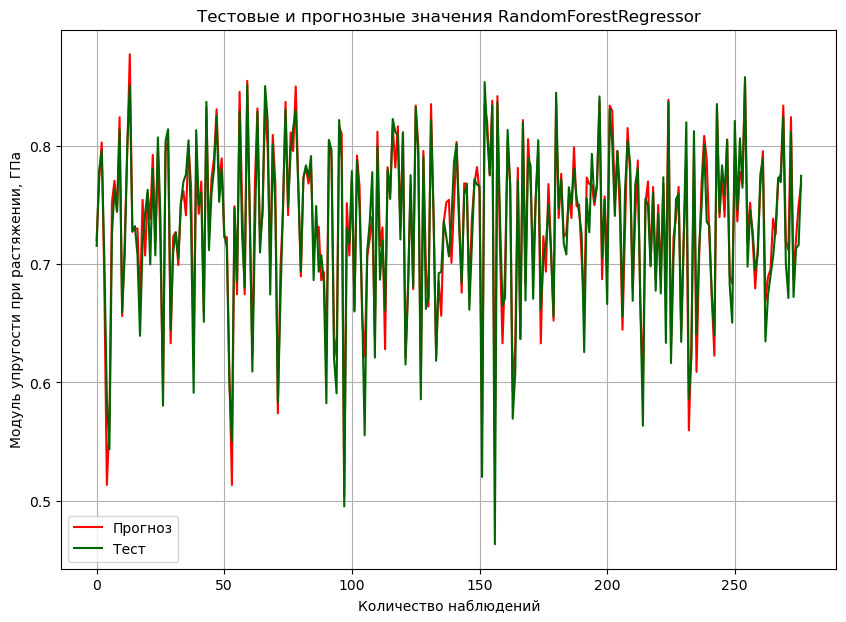

In [72]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Регрессия дерева решений

In [73]:
regressor_DT_2 = DecisionTreeRegressor( random_state = 0)
regressor_DT_2.fit(x_train_2, y_train_2)

DecisionTreeRegressor(random_state=0)

In [74]:
y_pred_DT_2 = regressor_DT_2.predict(x_test_2)

In [75]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_DT_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_DT_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_DT_2)))
print ('R_Squared:', r2_score(y_test_2, y_pred_DT_2))

Mean Absolute Error: 0.001258718855468276
Mean Squared Error: 2.7002311405505607e-06
Root Mean Squared Error: 0.0016432380048400051
R_Squared: 0.5805831240523411


In [76]:
R_Squared_DT_2=r2_score(y_test_2, y_pred_DT_2)

In [77]:
print("Train score: {:.2f}".format(regressor_DT_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_DT_2.score(x_test_2, y_test_2)))

Train score: 1.00
Test score: 0.58


[Text(0.5474378147667216, 0.9761904761904762, 'X[1] <= 0.594\nsquared_error = 0.0\nsamples = 645\nvalue = 0.022'),
 Text(0.2549477968669762, 0.9285714285714286, 'X[1] <= 0.547\nsquared_error = 0.0\nsamples = 335\nvalue = 0.02'),
 Text(0.08265560141004794, 0.8809523809523809, 'X[1] <= 0.493\nsquared_error = 0.0\nsamples = 141\nvalue = 0.019'),
 Text(0.02058370421088668, 0.8333333333333334, 'X[5] <= 0.06\nsquared_error = 0.0\nsamples = 29\nvalue = 0.018'),
 Text(0.009928106812735364, 0.7857142857142857, 'X[9] <= 0.0\nsquared_error = 0.0\nsamples = 4\nvalue = 0.017'),
 Text(0.00718931872646354, 0.7380952380952381, 'X[7] <= 0.824\nsquared_error = 0.0\nsamples = 2\nvalue = 0.016'),
 Text(0.005819924683327628, 0.6904761904761905, 'squared_error = 0.0\nsamples = 1\nvalue = 0.016'),
 Text(0.008558712769599451, 0.6904761904761905, 'squared_error = 0.0\nsamples = 1\nvalue = 0.017'),
 Text(0.01266689489900719, 0.7380952380952381, 'X[6] <= 0.178\nsquared_error = 0.0\nsamples = 2\nvalue = 0.017'),


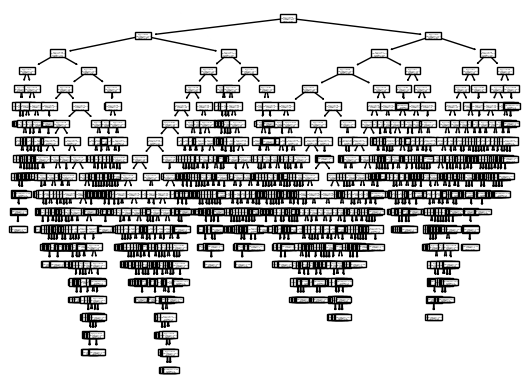

In [78]:
tree.plot_tree(regressor_DT_2)

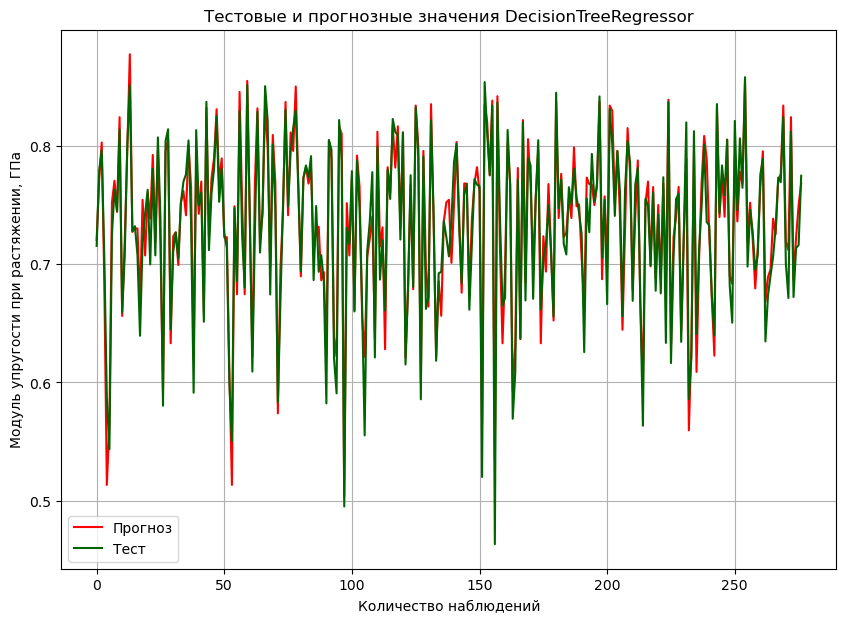

In [79]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Регрессия LASSO

In [80]:
from sklearn import linear_model
regressor_LS_2 = linear_model.Lasso(alpha=0.1)
regressor_LS_2.fit(x_train_2, y_train_2)

Lasso(alpha=0.1)

In [81]:
y_pred_LS_2 = regressor_LS_2.predict(x_test_2)

In [82]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_LS_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_LS_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_LS_2)))
print ('R Squared:', r2_score(y_test_2, y_pred_LS_2))

Mean Absolute Error: 0.0019707778238953967
Mean Squared Error: 6.447270366672521e-06
Root Mean Squared Error: 0.0025391475669351163
R Squared: -0.001430564580614968


In [83]:
R_Squared_LS_2=r2_score(y_test_2, y_pred_LS_2)

In [84]:
print("Train score: {:.2f}".format(regressor_LS_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_LS_2.score(x_test_2, y_test_2)))

Train score: 0.00
Test score: -0.00


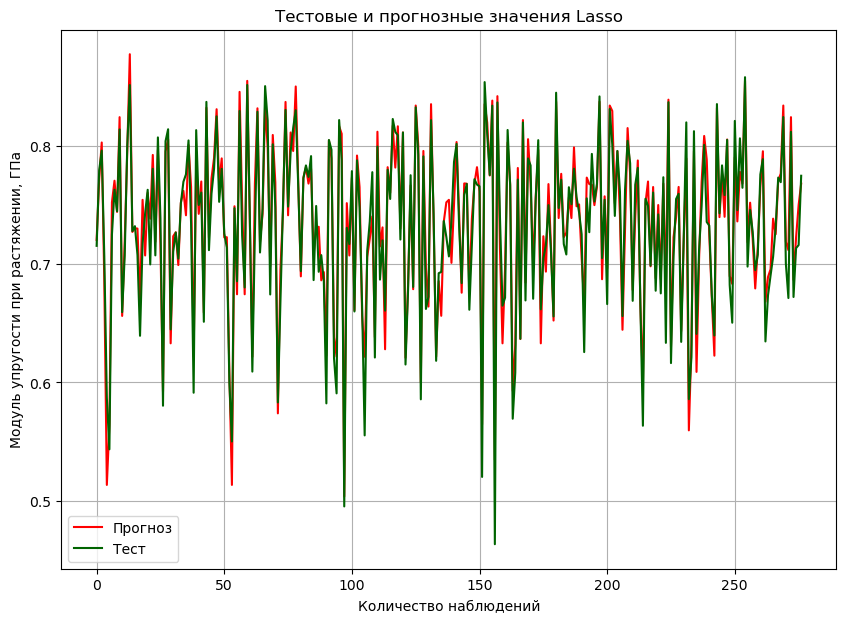

In [85]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# kNN

In [86]:
regressor_KNN_2 = KNeighborsRegressor(n_neighbors=3)
regressor_KNN_2.fit(x_train_2, y_train_2)

KNeighborsRegressor(n_neighbors=3)

In [87]:
y_pred_KNN_2 = regressor_KNN.predict(x_test_2)

In [88]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_KNN_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_KNN_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_KNN_2)))
print ('R Squared:', r2_score(y_test_2, y_pred_KNN_2))

Mean Absolute Error: 0.6950367530720957
Mean Squared Error: 0.48707761106079417
Root Mean Squared Error: 0.6979094576381625
R Squared: -75654.95659840957


In [89]:
R_Squared_KNN_2=r2_score(y_test_2, y_pred_KNN_2)

In [90]:
print("Train score: {:.2f}".format(regressor_KNN_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_KNN_2.score(x_test_2, y_test_2)))

Train score: 0.82
Test score: 0.71


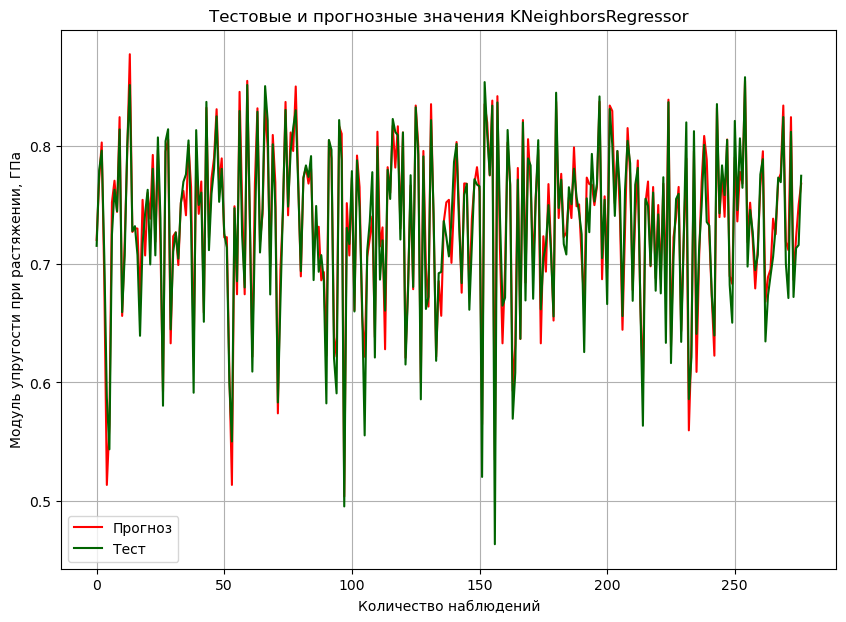

In [91]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения KNeighborsRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Метод опорных векторов(Support Vector Machines)

In [92]:
from sklearn import svm
regressor_SVR_2 = svm.SVR()
regressor_SVR_2.fit(x_train_2, y_train_2)

SVR()

In [93]:
y_pred_SVR_2 = regressor_SVR_2.predict(x_test_2)

In [94]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_SVR_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_SVR_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_SVR_2)))
print ('R Squared:', r2_score(y_test_2, y_pred_SVR_2))

Mean Absolute Error: 0.002241692146240299
Mean Squared Error: 7.5511979307194305e-06
Root Mean Squared Error: 0.002747944309974172
R Squared: -0.17289953374843958


In [95]:
R_Squared_SVR_2=r2_score(y_test_2, y_pred_SVR_2)

In [96]:
print("Train score: {:.2f}".format(regressor_SVR_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_SVR_2.score(x_test_2, y_test_2)))

Train score: -0.22
Test score: -0.17


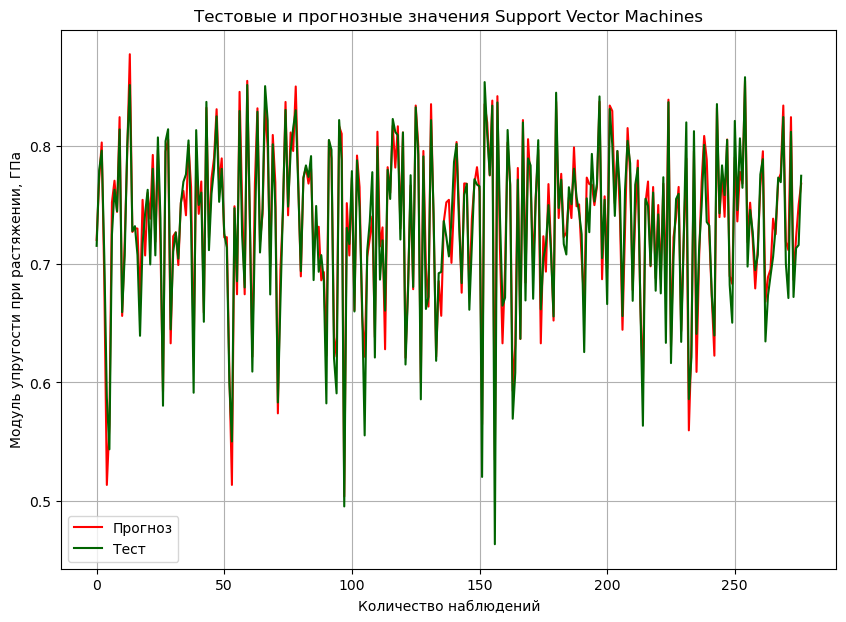

In [97]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Machines")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Гребневая регрессия (ридж-регрессия)

In [98]:
regressor_R_2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
regressor_R_2.fit(x_train_2, y_train_2)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]))

In [99]:
y_pred_R_2 = regressor_R_2.predict(x_test_2)

In [100]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_R_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_R_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_R_2)))
print ('R Squared:', r2_score(y_test_2, y_pred_R_2))

Mean Absolute Error: 0.0009670593869027563
Mean Squared Error: 1.4214490133788044e-06
Root Mean Squared Error: 0.0011922453662643459
R Squared: 0.7792116032005088


In [101]:
R_Squared_R_2=r2_score(y_test_2, y_pred_R_2)

In [102]:
print("Train score: {:.2f}".format(regressor_R_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_R_2.score(x_test_2, y_test_2)))

Train score: 0.78
Test score: 0.78


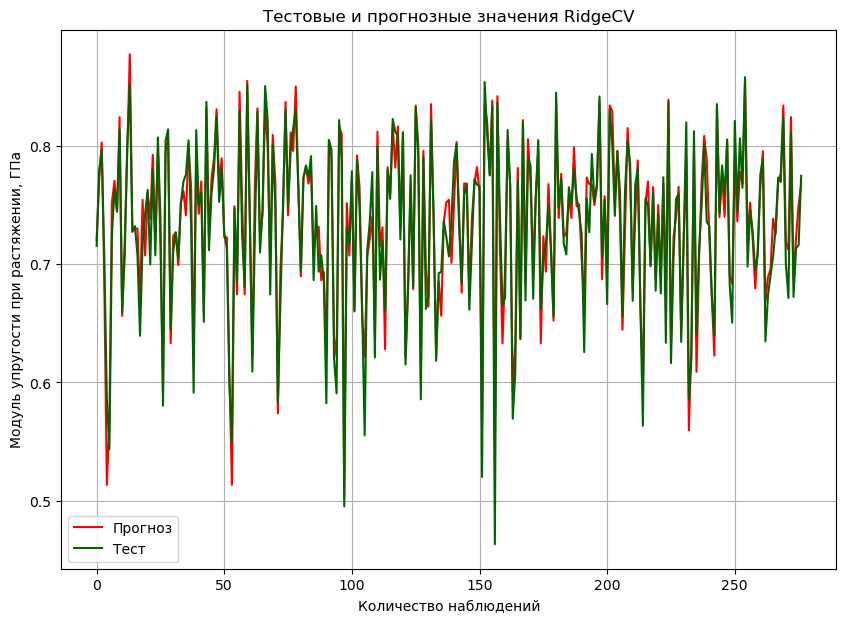

In [103]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения RidgeCV")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# Метод градиентного бустинга - Gradient Boosting Regressor

In [104]:
regressor_GBR_2 = GradientBoostingRegressor( random_state=0)
regressor_GBR_2.fit(x_train_2, y_train_2)

GradientBoostingRegressor(random_state=0)

In [105]:
y_pred_GBR_2 = regressor_GBR_2.predict(x_test_2)

In [106]:
print('Mean Absolute Error:', mean_absolute_error(y_test_2, y_pred_GBR_2))
print('Mean Squared Error:', mean_squared_error(y_test_2, y_pred_GBR_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_2, y_pred_GBR_2)))
print ('R Squared:', r2_score(y_test_2, y_pred_GBR_2))

Mean Absolute Error: 0.0009518126204105089
Mean Squared Error: 1.372847426949873e-06
Root Mean Squared Error: 0.001171685720212495
R Squared: 0.7867607071420203


In [107]:
R_Squared_GBR_2=r2_score(y_test_2, y_pred_GBR_2)

In [108]:
print("Train score: {:.2f}".format(regressor_GBR_2.score(x_train_2, y_train_2)))
print("Test score: {:.2f}".format(regressor_GBR_2.score(x_test_2, y_test_2)))

Train score: 0.91
Test score: 0.79


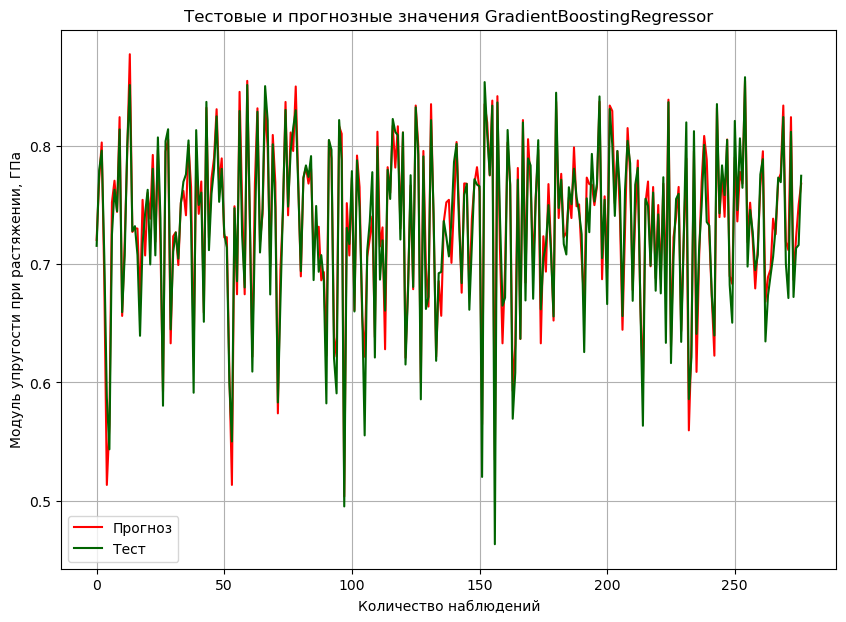

In [109]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(y_pred_DT, label = "Прогноз", color = 'red')
plt.plot(y_test.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [110]:
R_Squared_df_norm_2 = {'Регрессор': ['Support Vector', 'RandomForest',  'GradientBoosting', 'KNeighbors', 'DecisionTree','Lasso','Ridge',], 'R_Squared': [R_Squared_SVR_2,R_Squared_RF_2,R_Squared_GBR_2,R_Squared_KNN_2, R_Squared_DT_2, R_Squared_LS_2,R_Squared_R_2]}
R_Squared_df_norm_2 = pd.DataFrame(R_Squared_df_norm_2)

In [111]:
R_Squared_df_norm_2

,Регрессор,R_Squared
0,Support Vector,-0.172900
1,RandomForest,0.780622
2,GradientBoosting,0.786761
3,KNeighbors,-75654.956598
4,DecisionTree,0.580583
5,Lasso,-0.001431
6,Ridge,0.779212


В прогнозиовании- модуль упругости при растяжении наилучший результат показал алгоритм
-GradientBoosting . Вцелом ,за некоторым исключением,алгоритмы регрессии показали нелохие
результаты.Суммируя показатели ,алгоритм GradientBoosting показал хорошие результаты
по метрике -R_Squared.KNeighbors показал самые противоичивые результаты.Хорошо проявив себя
в прогнозировании-ПРОЧНОСТЬ ПРИ РАСТЯЖЕНИИ,в прогнозировании - модуль упругости при растяжении
покозал очень плохие цифы.